In [1]:
import torch

from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

from torch.utils.data import DataLoader
from torch.nn import Module, Conv2d, MaxPool2d, Flatten, Linear, CrossEntropyLoss
from torch.nn.functional import relu, softmax
from torch.optim import Adam

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CIFAR10 : data 폴더에 다운로드 해왔다. train과 test의 비율은 이미 나눠져 있다. ToTensor는 텐서 객체로 변환해주세요, 0~1 정규화도 시켜준자.
train = CIFAR10(root="data", train=True, download=True, transform=ToTensor())
test = CIFAR10(root="data", train=False, download=True, transform=ToTensor())

In [3]:
train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
train.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [7]:
name_list = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
train.data[0].shape

(32, 32, 3)

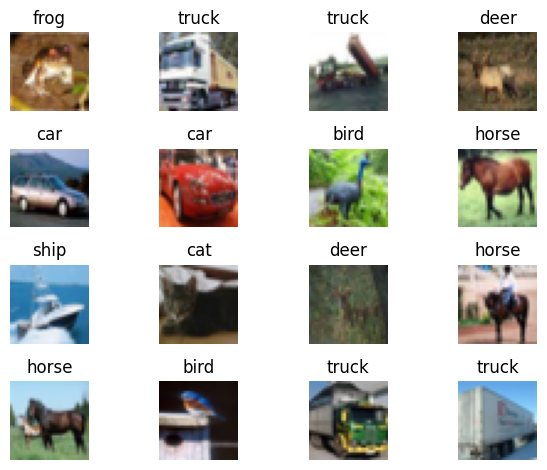

In [9]:
for idx, image in enumerate(train.data[:16]):
    plt.subplot(4, 4, idx+1)
    plt.imshow(image)
    plt.title(name_list[train.targets[idx]])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [10]:
# 한 엑폭당 데이터를 4개를 넣어 줄거다. 입력값이 4개가 들어갈건데 4개가 모두 들어가고 난 뒤 에폭이 끝난다.
batch_size = 4
trainset = DataLoader(train, batch_size, shuffle=True)

In [11]:
testset = DataLoader(test, batch_size, shuffle=True)

In [14]:
class CNN(Module):
    def __init__(self):
        super().__init__()

        # Conv2d(input channel, output channel, kernel)
        self.conv1 = Conv2d(3, 6, 5)
        self.conv2 = Conv2d(6, 16, 5)
        self.pool = MaxPool2d(2, 2)

        self.flatten = Flatten()
        # 32 * 32 -> 28 * 28 -> 14 * 14 -> 10 * 10 -> 5 * 5
        # Linear(input, output)
        self.layer01 = Linear(16 * 5 * 5, 120)
        self.layer02 = Linear(120, 64)
        self.layer03 = Linear(64, 10)

    def forward(self, x):
        x = self.pool(relu(self.conv1(x)))
        x = self.pool(relu(self.conv2(x)))

        # 풀리 커넥티드 레이어
        x = self.flatten(x)
        x = relu(self.layer01(x))
        x = relu(self.layer02(x))
        x = softmax(self.layer03(x), dim=1)

        return x

In [15]:
model = CNN()

In [16]:
loss_function = CrossEntropyLoss()

learning_rate = 0.001
optomizer = Adam(model.parameters(), lr=learning_rate)

In [17]:
loss_list = list()

for epoch in range(5):
    running_loss = 0.0
    acc_cnt = 0
    correct = 0
    total = 0

    for i, data in enumerate(trainset):
        x_train, y_train = data

        # optimizer 초기화
        optomizer.zero_grad()

        # 순진파
        h = model(x_train)
        loss = loss_function(h, y_train)
    
        # 역전파
        loss.backward()
    
        # opt
        optomizer.step()

        loss = loss.item()
        loss_list.append(loss)

        if i % 1000 == 0:
            print(f"epoch: {epoch} ({i:5d}) \t loss : {loss:.3f}")
  


epoch: 0 (    0) 	 loss : 2.303
epoch: 0 ( 1000) 	 loss : 2.206
epoch: 0 ( 2000) 	 loss : 2.267
epoch: 0 ( 3000) 	 loss : 2.422
epoch: 0 ( 4000) 	 loss : 2.401
epoch: 0 ( 5000) 	 loss : 1.918
epoch: 0 ( 6000) 	 loss : 2.184
epoch: 0 ( 7000) 	 loss : 2.119
epoch: 0 ( 8000) 	 loss : 2.189
epoch: 0 ( 9000) 	 loss : 2.188
epoch: 0 (10000) 	 loss : 2.429
epoch: 0 (11000) 	 loss : 2.036
epoch: 0 (12000) 	 loss : 1.947
epoch: 1 (    0) 	 loss : 2.051
epoch: 1 ( 1000) 	 loss : 1.925
epoch: 1 ( 2000) 	 loss : 1.885
epoch: 1 ( 3000) 	 loss : 2.143
epoch: 1 ( 4000) 	 loss : 2.199
epoch: 1 ( 5000) 	 loss : 1.850
epoch: 1 ( 6000) 	 loss : 2.426
epoch: 1 ( 7000) 	 loss : 2.078
epoch: 1 ( 8000) 	 loss : 2.048
epoch: 1 ( 9000) 	 loss : 2.209
epoch: 1 (10000) 	 loss : 1.720
epoch: 1 (11000) 	 loss : 1.783
epoch: 1 (12000) 	 loss : 2.406
epoch: 2 (    0) 	 loss : 1.940
epoch: 2 ( 1000) 	 loss : 2.056
epoch: 2 ( 2000) 	 loss : 2.191
epoch: 2 ( 3000) 	 loss : 2.438
epoch: 2 ( 4000) 	 loss : 2.190
epoch: 2

In [ ]:
# iter : 배치 사이즈에 맞게 테스트 데이터를 가져오겠다.
test_iter = iter(testset)
x_test, y_test = next(test_iter)

In [19]:
predict = model(x_test)
predict

tensor([[1.3859e-24, 2.7153e-25, 2.3565e-36, 3.2288e-27, 2.4866e-32, 5.3249e-43,
         6.2453e-32, 0.0000e+00, 1.0000e+00, 1.1145e-34],
        [8.9506e-02, 1.3992e-04, 4.1214e-11, 1.1325e-11, 3.5134e-12, 1.9112e-10,
         1.1198e-18, 3.1053e-04, 1.2967e-07, 9.1004e-01],
        [5.7813e-04, 4.6751e-04, 3.3015e-09, 3.4559e-09, 4.0775e-10, 6.5596e-10,
         9.2844e-13, 1.7047e-05, 1.4174e-05, 9.9892e-01],
        [6.2807e-12, 8.7994e-19, 7.4344e-04, 2.3662e-14, 9.9924e-01, 6.0211e-13,
         1.4208e-12, 1.3292e-05, 2.2435e-20, 2.0598e-21]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
# 맥스 값을 가져올거다.  / values=tensor([1.0000, 0.9100, 0.9989, 0.9992], 값이 필요 없기 때문에 맨 앞의 값을 생략하는 -, 을 넣어준다.
_, predict_labels = torch.max(predict, 1)
print(predict_labels)
print(y_test)

tensor([8, 9, 9, 4])
tensor([8, 9, 0, 0])


In [22]:
torch.max(predict, 1)

torch.return_types.max(
values=tensor([1.0000, 0.9100, 0.9989, 0.9992], grad_fn=<MaxBackward0>),
indices=tensor([8, 9, 9, 4]))

In [ ]:
correct = 0
total = 0

# no_grad : 기울기 계산 X , 확인을 위한 함수이고 검증을 위해서는 w, b가 변하면 안되기 때문에 오티마이저 안할려고 
with torch.no_grad():
    for data in testset:
        x_test, y_test = data
        h = model(x_test)
        _, predicted = torch.max(h.data, 1)
        total += y_test.size(0)
        correct += (predicted == y_test).sum().item()

print(f"acc : {100 * correct // total}")


acc : 44
